In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df = pd.read_csv('Alcohol_Sales_Data.csv')
df.head()

,DATE,Millions of Dollars
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
df.tail()

,DATE,Millions of Dollars
352,2021-05-01,15499
353,2021-06-01,17830
354,2021-07-01,15742
355,2021-08-01,16142
356,2021-09-01,15772


In [5]:
df.shape

(357, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE                 357 non-null    object
 1   Millions of Dollars  357 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [7]:
df.isnull().sum()

DATE                   0
Millions of Dollars    0
dtype: int64

In [8]:
time = pd.date_range(start='1/1/1992',end='09/30/2021',freq='M')
time

DatetimeIndex(['1992-01-31', '1992-02-29', '1992-03-31', '1992-04-30',
               '1992-05-31', '1992-06-30', '1992-07-31', '1992-08-31',
               '1992-09-30', '1992-10-31',
               ...
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30'],
              dtype='datetime64[ns]', length=357, freq='M')

In [9]:
len(time)

357

In [10]:
df['time_stamp'] = pd.DataFrame(time)

In [11]:
df.head()

,DATE,Millions of Dollars,time_stamp
0,1992-01-01,3459,1992-01-31
1,1992-02-01,3458,1992-02-29
2,1992-03-01,4002,1992-03-31
3,1992-04-01,4564,1992-04-30
4,1992-05-01,4221,1992-05-31


In [12]:
df.tail()

,DATE,Millions of Dollars,time_stamp
352,2021-05-01,15499,2021-05-31
353,2021-06-01,17830,2021-06-30
354,2021-07-01,15742,2021-07-31
355,2021-08-01,16142,2021-08-31
356,2021-09-01,15772,2021-09-30


In [13]:
df.drop('DATE',axis=1,inplace=True)

In [14]:
df = df.set_index('time_stamp')

In [15]:
df

,Millions of Dollars
time_stamp,
1992-01-31,3459
1992-02-29,3458
1992-03-31,4002
1992-04-30,4564
1992-05-31,4221
...,...
2021-05-31,15499
2021-06-30,17830
2021-07-31,15742


In [16]:
df.head()

,Millions of Dollars
time_stamp,
1992-01-31,3459
1992-02-29,3458
1992-03-31,4002
1992-04-30,4564
1992-05-31,4221


In [17]:
df.tail()

,Millions of Dollars
time_stamp,
2021-05-31,15499
2021-06-30,17830
2021-07-31,15742
2021-08-31,16142
2021-09-30,15772


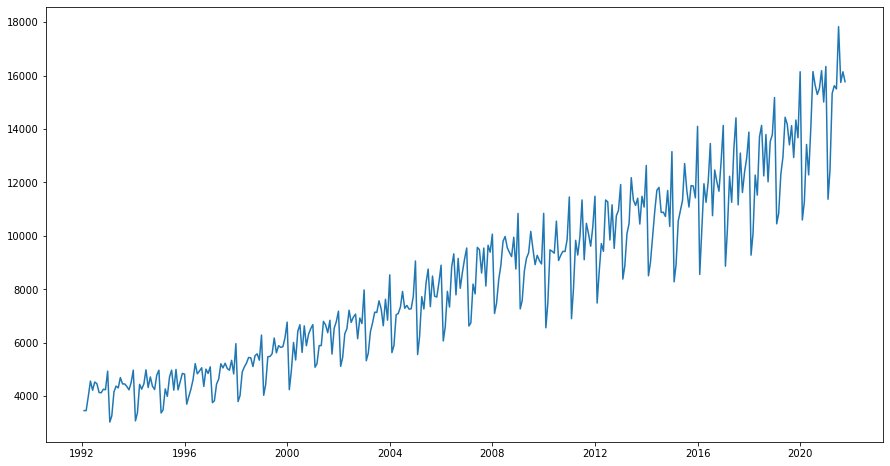

In [18]:
plt.plot(df)
plt.show()

In [19]:
plt.rcParams['figure.figsize'] = [15,8]

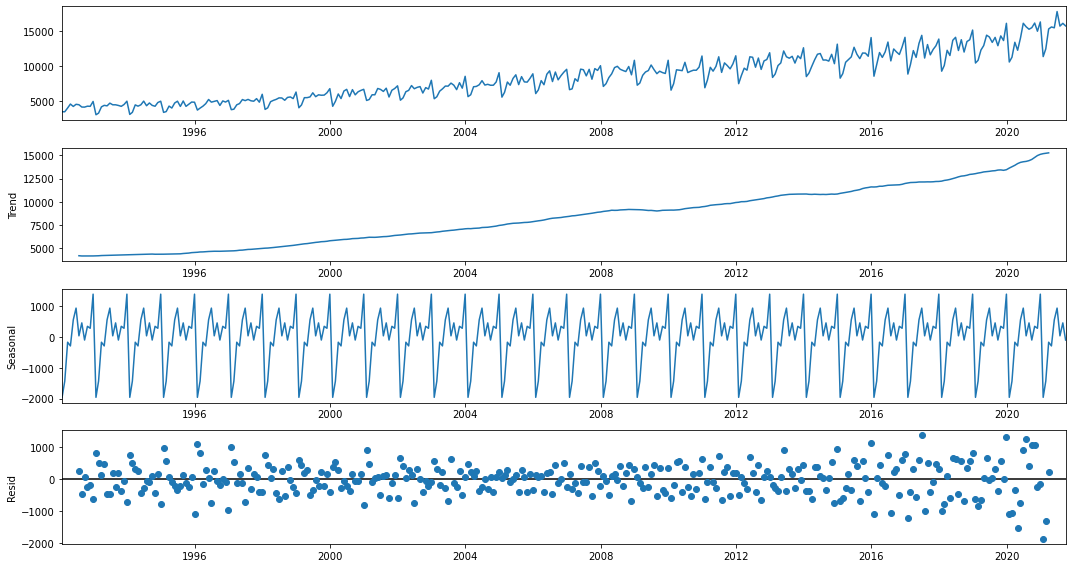

In [20]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

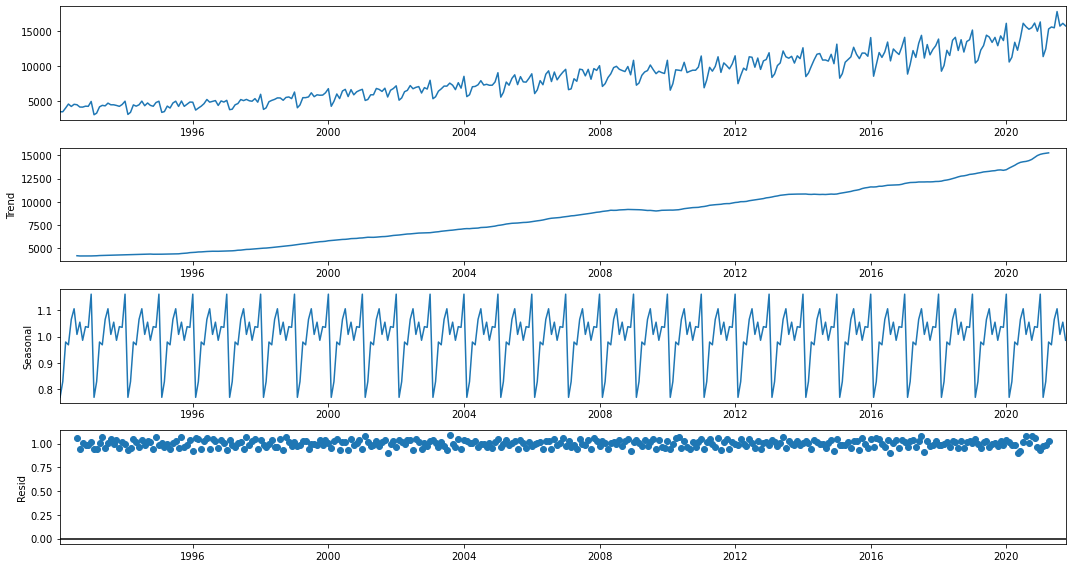

In [21]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

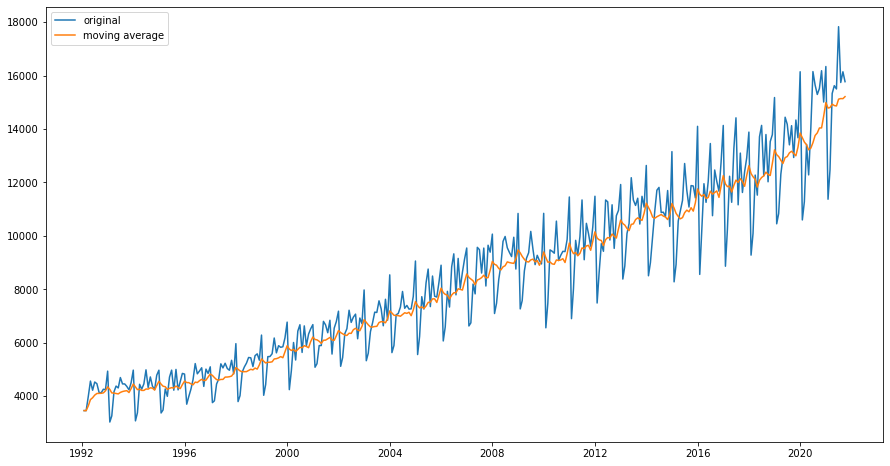

In [22]:
plt.plot(df,label='original')
plt.plot(df.rolling(10,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [22]:
# Model building - Exponential Smoothing Techniques

In [23]:
train = df.iloc[:321]
test = df.iloc[321:]

In [24]:
train.tail()

,Millions of Dollars
time_stamp,
2018-05-31,13709
2018-06-30,14135
2018-07-31,12245
2018-08-31,13793
2018-09-30,12024


In [25]:
test.head()

,Millions of Dollars
time_stamp,
2018-10-31,13530
2018-11-30,13788
2018-12-31,15178
2019-01-31,10451
2019-02-28,10836


In [26]:
len(train)

321

In [27]:
len(test)

36

##### Simple Exponential Smoothing

In [67]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=0.3516279)
SES_model.summary()

Dep. Variable:,Millions of Dollars,No. Observations:,321
Model:,SimpleExpSmoothing,SSE,359106111.461
Optimized:,True,AIC,4474.788
Trend:,None,BIC,4482.331
Seasonal:,None,AICC,4474.914
Seasonal Periods:,None,Date:,"Mon, 21 Mar 2022"
Box-Cox:,False,Time:,17:12:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3516279,alpha,False
initial_level,3795.2576,l.0,True


In [68]:
SES_predict = SES_model.forecast(len(test))

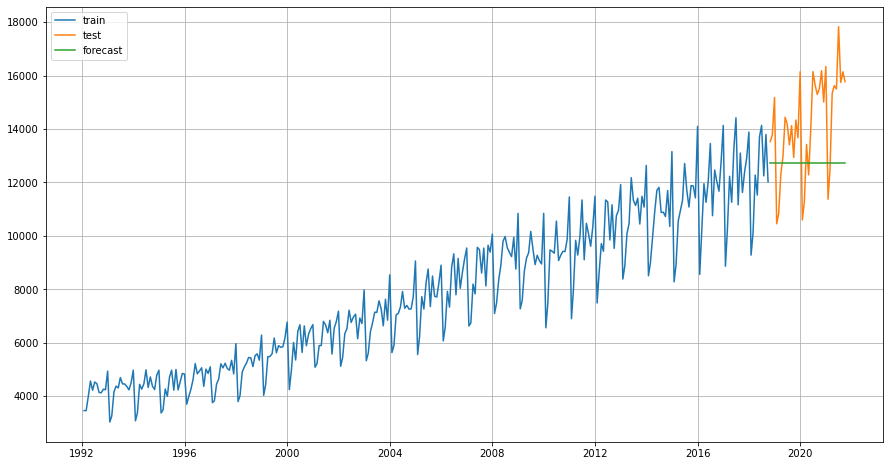

In [69]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [70]:
print("MAE:",MAE(test['Millions of Dollars'],SES_predict))
print("MAPE:",MAPE(test['Millions of Dollars'],SES_predict))

MAE: 2011.7035187891702
MAPE: 13.724630771068632


##### Double Exponential Smoothing

In [135]:
DES = Holt(train,exponential=True,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.3516279,
                   smoothing_trend=0.1007143)
DES_model.summary()

Dep. Variable:,Millions of Dollars,No. Observations:,321
Model:,Holt,SSE,382858123.031
Optimized:,True,AIC,4499.347
Trend:,Multiplicative,BIC,4514.432
Seasonal:,None,AICC,4499.614
Seasonal Periods:,None,Date:,"Mon, 21 Mar 2022"
Box-Cox:,False,Time:,17:25:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3516279,alpha,False
smoothing_trend,0.1007143,beta,False


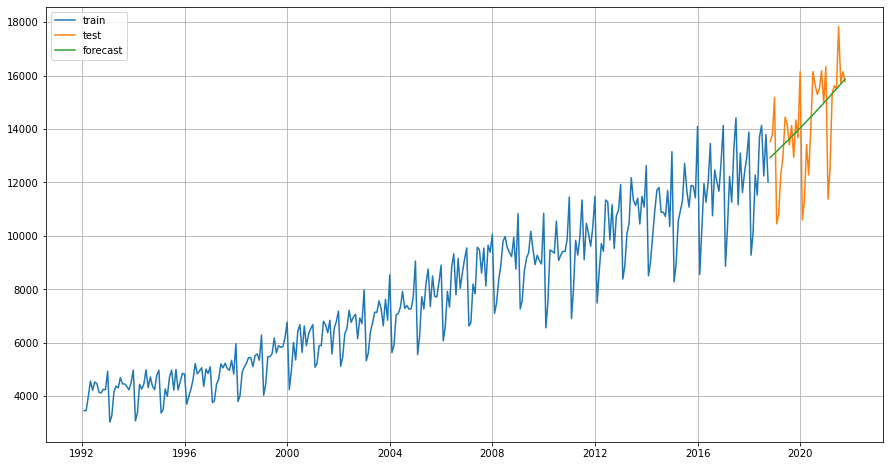

In [136]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [137]:
print("MAE:",MAE(test['Millions of Dollars'],DES_predict))
print("MAPE:",MAPE(test['Millions of Dollars'],DES_predict))

MAE: 1162.5535293215228
MAPE: 8.983106756590633


##### Triple Exponential Smoothing

In [247]:
TES = ExponentialSmoothing(train,trend='multiplicative',
                           seasonal='additive',
                           initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.3516279,
                   smoothing_trend=0.1007143,
                   smoothing_seasonal=0.6529286)
TES_model.summary()

Dep. Variable:,Millions of Dollars,No. Observations:,321
Model:,ExponentialSmoothing,SSE,56783355.808
Optimized:,True,AIC,3910.743
Trend:,Multiplicative,BIC,3971.086
Seasonal:,Additive,AICC,3913.008
Seasonal Periods:,12,Date:,"Mon, 21 Mar 2022"
Box-Cox:,False,Time:,17:44:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3516279,alpha,False
smoothing_trend,0.1007143,beta,False


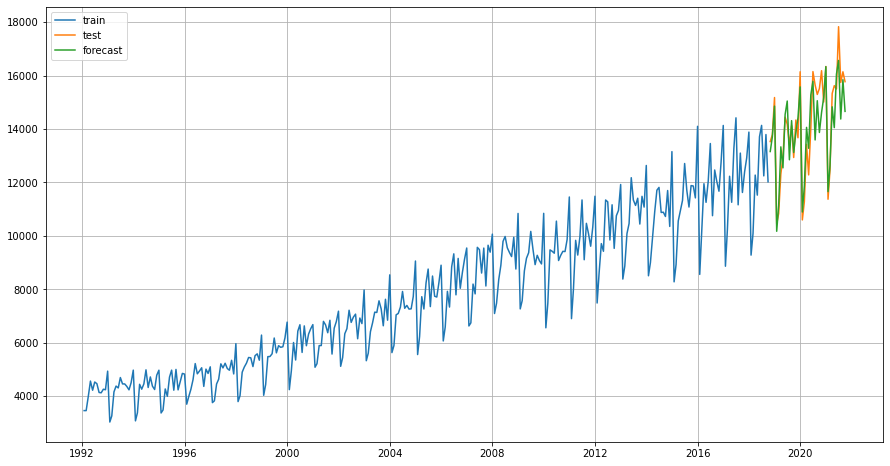

In [248]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [249]:
print("MAE:",MAE(test['Millions of Dollars'],TES_predict))
print("MAPE:",MAPE(test['Millions of Dollars'],TES_predict))

MAE: 649.3129849329403
MAPE: 4.4937470223164775


##### ACF and PACF plots

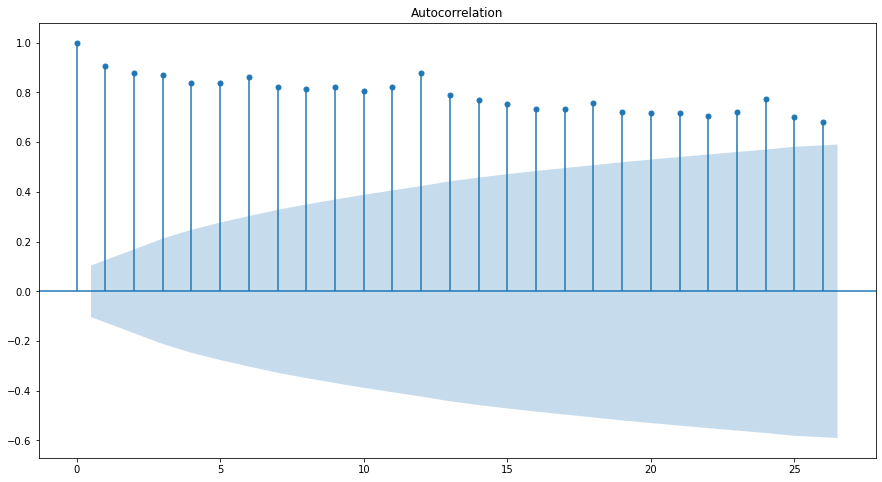

In [271]:
plot_acf(df)
plt.show()

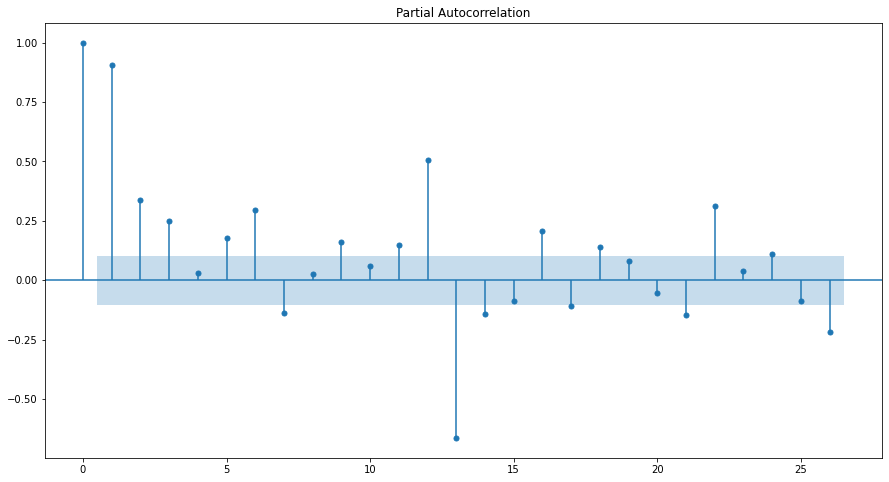

In [272]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [273]:
observations = df.values
df_results = adfuller(observations)
df_results

(2.4010704351860443,
 0.9990108124827649,
 17,
 339,
 {'1%': -3.4497880749874628,
  '5%': -2.870103829170425,
  '10%': -2.571332495975496},
 5085.32400378327)

In [87]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

##### ARIMA Model

In [275]:
import itertools

In [276]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)


In [277]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [278]:
from warnings import filterwarnings
filterwarnings('ignore')

In [279]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 5497.381040832374
ARIMA (0, 1, 1) AIC: 5313.709144567278
ARIMA (0, 1, 2) AIC: 5313.619465172471
ARIMA (0, 1, 3) AIC: 5312.619510421582
ARIMA (1, 1, 0) AIC: 5437.889325076295
ARIMA (1, 1, 1) AIC: 5313.957467691288
ARIMA (1, 1, 2) AIC: 5313.885590460646
ARIMA (1, 1, 3) AIC: 5294.959661606429
ARIMA (2, 1, 0) AIC: 5401.1598659206675
ARIMA (2, 1, 1) AIC: 5313.752079873908
ARIMA (2, 1, 2) AIC: 5315.242679231409
ARIMA (2, 1, 3) AIC: 5256.202407053977
ARIMA (3, 1, 0) AIC: 5400.070539848568
ARIMA (3, 1, 1) AIC: 5315.5340293643085
ARIMA (3, 1, 2) AIC: 5292.797239007714
ARIMA (3, 1, 3) AIC: 5230.8490344046395


In [280]:
df_score_arima.sort_values('aic')

,param,aic
15,"(3, 1, 3)",5230.849034
11,"(2, 1, 3)",5256.202407
14,"(3, 1, 2)",5292.797239
7,"(1, 1, 3)",5294.959662
3,"(0, 1, 3)",5312.619510
2,"(0, 1, 2)",5313.619465
1,"(0, 1, 1)",5313.709145
9,"(2, 1, 1)",5313.752080
6,"(1, 1, 2)",5313.885590
5,"(1, 1, 1)",5313.957468


In [281]:
arima_model = ARIMA(train,(3,1,3))
arima_results = arima_model.fit()
print(arima_results.summary())

                               ARIMA Model Results                               
Dep. Variable:     D.Millions of Dollars   No. Observations:                  320
Model:                    ARIMA(3, 1, 3)   Log Likelihood               -2607.425
Method:                          css-mle   S.D. of innovations            822.090
Date:                   Mon, 21 Mar 2022   AIC                           5230.849
Time:                           17:47:13   BIC                           5260.996
Sample:                       02-29-1992   HQIC                          5242.887
                            - 09-30-2018                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          27.8819      1.543     18.067      0.000      24.857      30.907
ar.L1.D.Millions of Dollars    -0.6433      0.058    -11

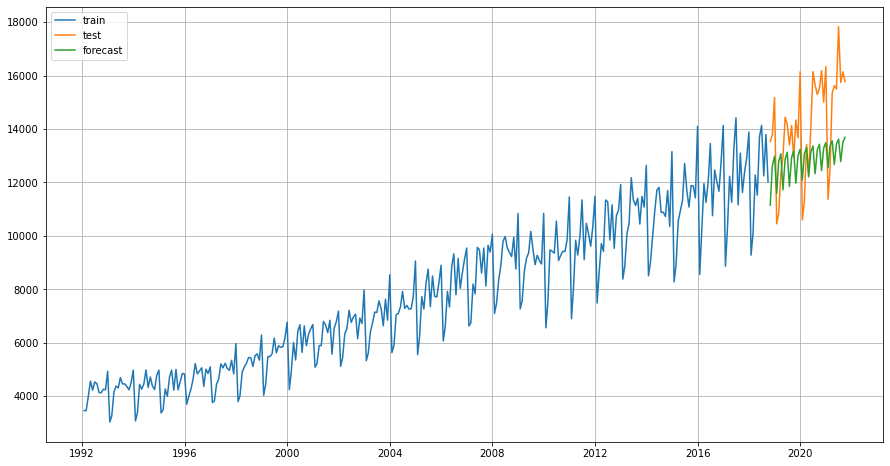

In [282]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [284]:
print("MAE:",MAE(test['Millions of Dollars'],forecasted_values_arima))
print("MAPE:",MAPE(test['Millions of Dollars'],forecasted_values_arima))

MAE: 1835.3391882098085
MAPE: 12.592395888327967


##### SARIMA Model

In [285]:
import itertools

In [286]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [287]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 1, 0) (0, 1, 0, 12) AIC: 4790.324076407624
SARIMAX (0, 1, 0) (0, 1, 1, 12) AIC: 4598.525031834584
SARIMAX (0, 1, 0) (0, 1, 2, 12) AIC: 4360.505399150135
SARIMAX (0, 1, 0) (0, 1, 3, 12) AIC: 4169.28605646195
SARIMAX (0, 1, 0) (1, 1, 0, 12) AIC: 4622.336439655477
SARIMAX (0, 1, 0) (1, 1, 1, 12) AIC: 4587.126654761524
SARIMAX (0, 1, 0) (1, 1, 2, 12) AIC: 4358.418020535606
SARIMAX (0, 1, 0) (1, 1, 3, 12) AIC: 4171.567868105989
SARIMAX (0, 1, 0) (2, 1, 0, 12) AIC: 4382.919915757944
SARIMAX (0, 1, 0) (2, 1, 1, 12) AIC: 4293.028235441152
SARIMAX (0, 1, 0) (2, 1, 2, 12) AIC: 4140.234105782714
SARIMAX (0, 1, 0) (2, 1, 3, 12) AIC: 3919.6073028420296
SARIMAX (0, 1, 0) (3, 1, 0, 12) AIC: 4074.2778260912487
SARIMAX (0, 1, 0) (3, 1, 1, 12) AIC: 4041.361701968257
SARIMAX (0, 1, 0) (3, 1, 2, 12) AIC: 3927.135286744592
SARIMAX (0, 1, 0) (3, 1, 3, 12) AIC: 3912.19111864983
SARIMAX (0, 1, 1) (0, 1, 0, 12) AIC: 4536.223084609748
SARIMAX (0, 1, 1) (0, 1, 1, 12) AIC: 4368.906857078022
SARIMAX (0

SARIMAX (2, 1, 1) (1, 1, 1, 12) AIC: 4262.691859831655
SARIMAX (2, 1, 1) (1, 1, 2, 12) AIC: 4090.8318914199785
SARIMAX (2, 1, 1) (1, 1, 3, 12) AIC: 3911.0098128080076
SARIMAX (2, 1, 1) (2, 1, 0, 12) AIC: 4104.949092349852
SARIMAX (2, 1, 1) (2, 1, 1, 12) AIC: 4083.5297758157717
SARIMAX (2, 1, 1) (2, 1, 2, 12) AIC: 4013.835744264025
SARIMAX (2, 1, 1) (2, 1, 3, 12) AIC: 3800.74266045249
SARIMAX (2, 1, 1) (3, 1, 0, 12) AIC: 3913.39513349793
SARIMAX (2, 1, 1) (3, 1, 1, 12) AIC: 3888.0302240739716
SARIMAX (2, 1, 1) (3, 1, 2, 12) AIC: 3804.376951101139
SARIMAX (2, 1, 1) (3, 1, 3, 12) AIC: 3809.4578652650835
SARIMAX (2, 1, 2) (0, 1, 0, 12) AIC: 4441.774393624807
SARIMAX (2, 1, 2) (0, 1, 1, 12) AIC: 4256.903379261053
SARIMAX (2, 1, 2) (0, 1, 2, 12) AIC: 4070.6040340075233
SARIMAX (2, 1, 2) (0, 1, 3, 12) AIC: 3907.1850938661487
SARIMAX (2, 1, 2) (1, 1, 0, 12) AIC: 4285.132712151691
SARIMAX (2, 1, 2) (1, 1, 1, 12) AIC: 4246.698947474701
SARIMAX (2, 1, 2) (1, 1, 2, 12) AIC: 4072.2028306377692
SARI

In [288]:
df_score.sort_values('aic')

,param,seasonal,aic
59,"(0, 1, 3)","(2, 1, 3, 12)",3773.988382
63,"(0, 1, 3)","(3, 1, 3, 12)",3774.834400
43,"(0, 1, 2)","(2, 1, 3, 12)",3786.975528
47,"(0, 1, 2)","(3, 1, 3, 12)",3787.255999
107,"(1, 1, 2)","(2, 1, 3, 12)",3788.298878
...,...,...,...
5,"(0, 1, 0)","(1, 1, 1, 12)",4587.126655
1,"(0, 1, 0)","(0, 1, 1, 12)",4598.525032
4,"(0, 1, 0)","(1, 1, 0, 12)",4622.336440
64,"(1, 1, 0)","(0, 1, 0, 12)",4655.382372


##### SARIMA Model - 1

In [133]:
model = SARIMAX(train,
                       order = (2,1,0),
                       seasonal_order = (3,1,0,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [134]:
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Millions of Dollars   No. Observations:                  321
Model:             SARIMAX(2, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -1952.229
Date:                            Tue, 22 Mar 2022   AIC                           3916.458
Time:                                    12:42:16   BIC                           3938.049
Sample:                                01-31-1992   HQIC                          3925.128
                                     - 09-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8600      0.054    -15.806      0.000      -0.967      -0.753
ar.L2         -0.5586      0.045   

In [135]:
forecast = sarimax_results.forecast(len(test))

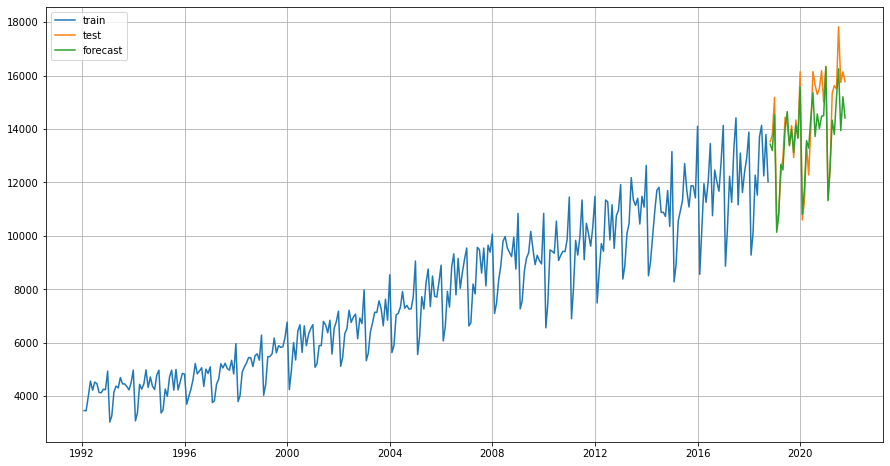

In [136]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [137]:
print("MAE:",MAE(test['Millions of Dollars'],forecast))
print("MAPE:",MAPE(test['Millions of Dollars'],forecast))

MAE: 635.155821741094
MAPE: 4.246695940170101


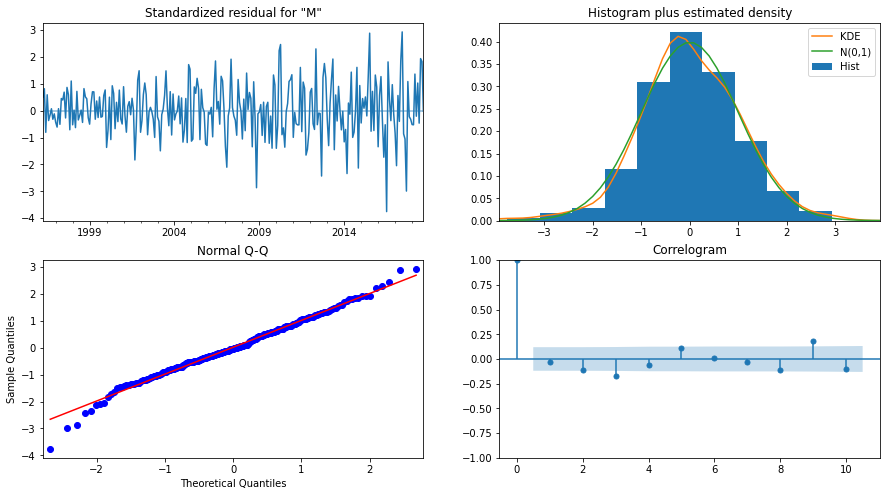

In [138]:
sarimax_results.plot_diagnostics();

##### SARIMA Model - 2

In [731]:
model = SARIMAX(train,
                       order = (0,1,2),
                       seasonal_order = (0,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [732]:
print(sarimax_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                  Millions of Dollars   No. Observations:                  321
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2154.137
Date:                              Mon, 21 Mar 2022   AIC                           4316.275
Time:                                      19:55:48   BIC                           4330.996
Sample:                                  01-31-1992   HQIC                          4322.171
                                       - 09-30-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2002      0.055    -21.896      0.000      -1.308      -1.093
ma.L2          0.43

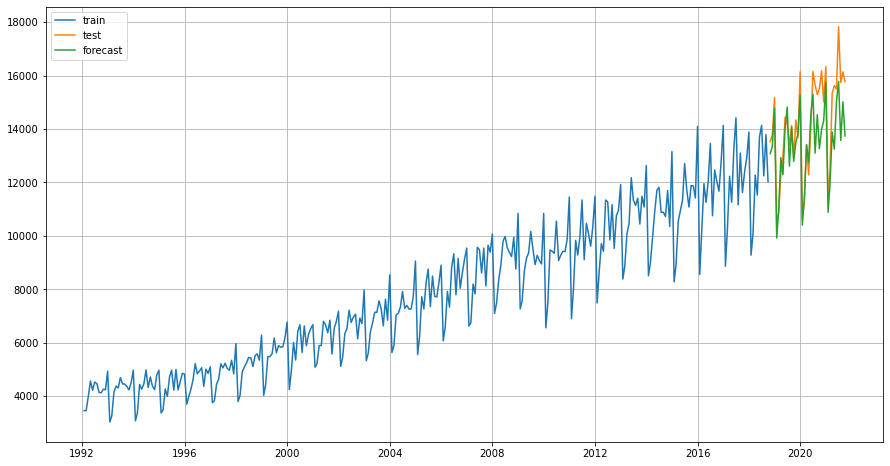

In [733]:
forecast = sarimax_results.forecast(len(test))

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [734]:
print("MAE:",MAE(test['Millions of Dollars'],forecast))
print("MAPE:",MAPE(test['Millions of Dollars'],forecast))

MAE: 864.1143460946524
MAPE: 5.779590986357989


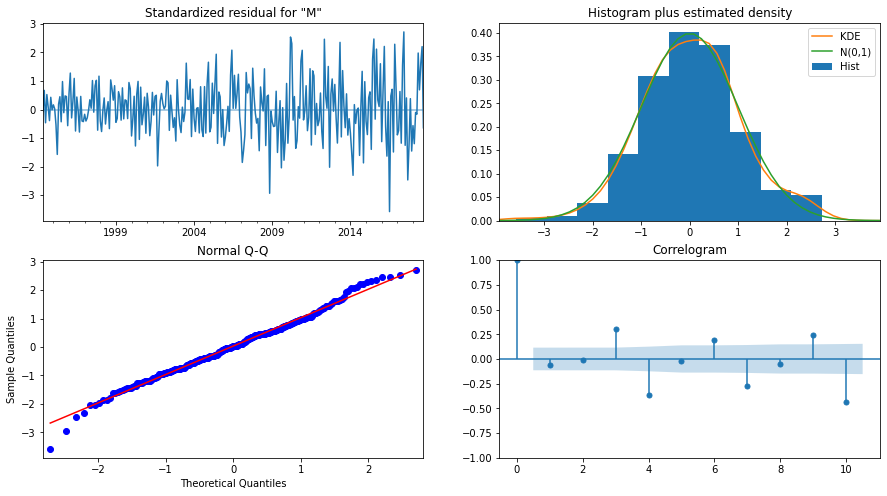

In [735]:
sarimax_results.plot_diagnostics();

##### SARIMA Model - 3

In [680]:
model = SARIMAX(train,
                       order = (13,1,3),
                       seasonal_order = (0,1,2,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [681]:
print(sarimax_results.summary())

                                        SARIMAX Results                                         
Dep. Variable:                      Millions of Dollars   No. Observations:                  321
Model:             SARIMAX(13, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1974.540
Date:                                  Mon, 21 Mar 2022   AIC                           3987.081
Time:                                          19:45:38   BIC                           4056.142
Sample:                                      01-31-1992   HQIC                          4014.781
                                           - 09-30-2018                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1066      1.422     -0.778      0.436      -3.893

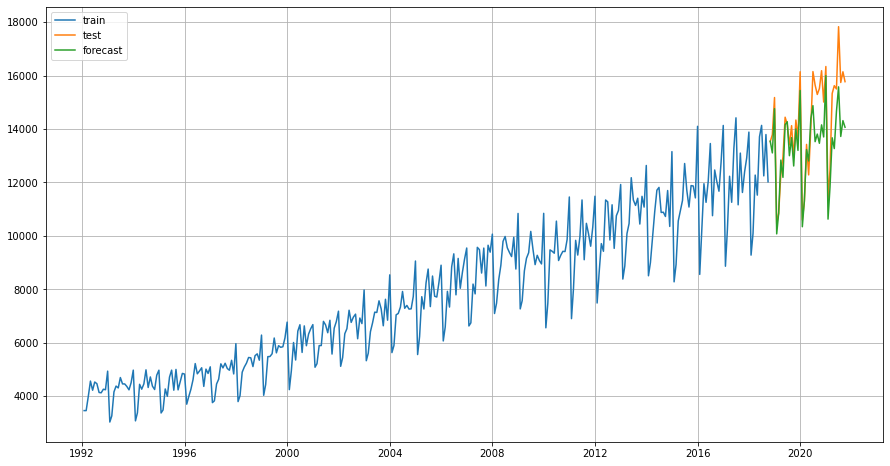

In [682]:
forecast = sarimax_results.forecast(len(test))

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [683]:
print("MAE:",MAE(test['Millions of Dollars'],forecast))
print("MAPE:",MAPE(test['Millions of Dollars'],forecast))

MAE: 884.7858132086973
MAPE: 5.897017510215864


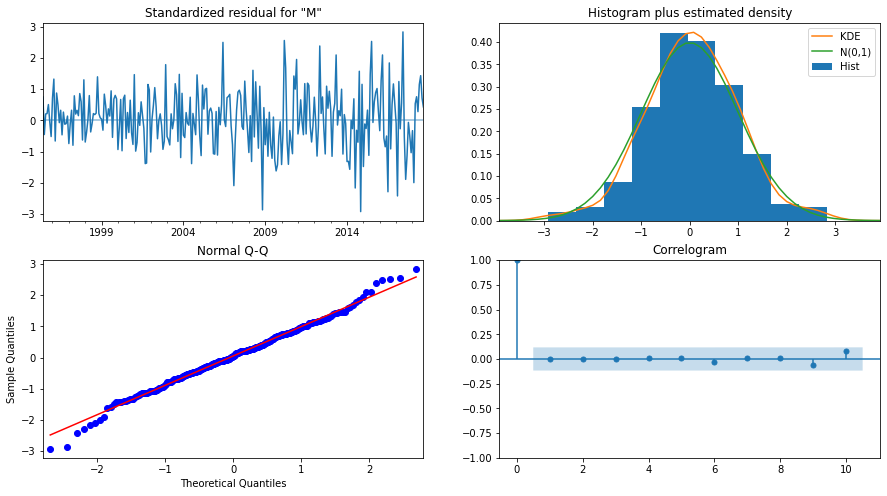

In [684]:
sarimax_results.plot_diagnostics();